<a href="https://colab.research.google.com/github/Ryanywan/NH_Upload/blob/main/NCP_CLOVA_summary_%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naver CLOVA summary**

## 사전 준비사항 : Application key

* Request URI : https://naveropenapi.apigw.ntruss.com/text-summary/v1/summarize

1. Client ID : (X-NCP-APIGW-API-KEY-ID)
2. Client Secret : (X-NCP-APIGW-API-KEY)

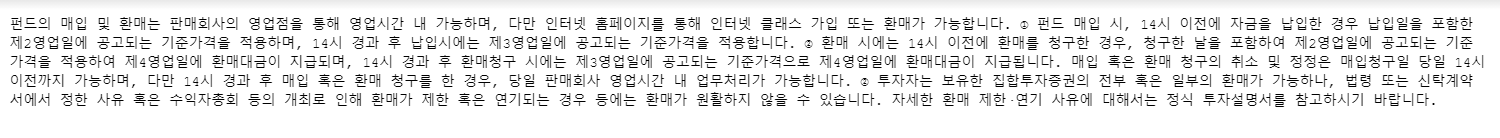

In [ ]:
import json
import requests

url = "https://naveropenapi.apigw.ntruss.com/text-summary/v1/summarize" # 문서요약

ID = "Your_NCP_ID"           # (X-NCP-APIGW-API-KEY-ID)
Secret = "Your_NCP_Secret"   # (X-NCP-APIGW-API-KEY)

with open('매입환매기준.txt', 'r') as f : # 요약하고자 하는 텍스트 파일
    text = f.read()
    
request_json = {
    "document": {
        "title" : "매입환매기준",
        "content": text
    },
    "option": {
        "language": "ko",    # ko : 한국어 / ja : 일본어
        "model": "general",  # general : 일반 / news : 뉴스
        "tone": 2,
        "summaryCount": 3
    }
}

headers = {
    "X-NCP-APIGW-API-KEY-ID": ID,
    "X-NCP-APIGW-API-KEY": Secret,
    "Content-Type": "application/json" # Fix
}

response = requests.post(url, data = json.dumps(request_json), headers = headers) # 요청 body에 json 형태가 아니라 파라미터면 data = (딕셔너리 형태)
rescode = response.status_code

if(rescode == 200):
    print (response.text)
else:
    print("Error : " + response.text)


{"summary":"펀드 매입 시, 14시 이전에 자금을 납입한 경우 납입일을 포함한 제2영업일에 공고되는 기준가격을 적용하며, 14시 경과 후 납입시에는 제3영업일에 공고되는 기준가격을 적용합니다.\n환매 시에는 14시 이전에 환매를 청구한 경우, 청구한 날을 포함하여 제2영업일에 공고되는 기준가격을 적용하여 제4영업일에 환매대금이 지급되며, 14시 경과 후 환매청구 시에는 제3영업일에 공고되는 기준가격으로 제4영업일에 환매대금이 지급됩니다.\n매입 혹은 환매 청구의 취소 및 정정은 매입청구일 당일 14시 이전까지 가능하며, 다만 14시 경과 후 매입 혹은 환매 청구를 한 경우, 당일 판매회사 영업시간 내 업무처리가 가능합니다."}
